# 1.导入数据

In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
#导入相关包

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import matplotlib.cm as cm

import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder         #编码转换
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.ensemble import RandomForestClassifier    #随机森林
from sklearn.svm import SVC,LinearSVC                  #支持向量机
from sklearn.linear_model import LogisticRegression    #逻辑回归
from sklearn.neighbors import KNeighborsClassifier     #KNN算法
from sklearn.naive_bayes import GaussianNB              #朴素贝叶斯
from sklearn.tree import DecisionTreeClassifier        #决策树分类器
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import classification_report,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.ensemble import VotingClassifier

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


In [4]:
# 读取数据文件
telcom=pd.read_csv(r"WA_Fn-UseC_-Telco-Customer-Churn.csv")

# 2.查看数据集信息

In [5]:
telcom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
print('telcom.shape:','\n',telcom.shape)
print('telcom.describe:','\n',telcom.describe())

telcom.shape: 
 (7043, 21)
telcom.describe: 
        SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


# 3.数据清洗

In [7]:
#查找缺失值

In [8]:
pd.isnull(telcom).sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
telcom['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [10]:
#查看数据集类型
telcom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
#转换类型
telcom['TotalCharges']=telcom['TotalCharges'].apply(pd.to_numeric, errors='coerce')
telcom['TotalCharges'].dtypes

dtype('float64')

In [12]:
#再次查找是否有缺失值
pd.isnull(telcom['TotalCharges']).sum()

11

In [13]:
#删除缺失值所在行
telcom.dropna(inplace=True)
telcom.shape

(7032, 21)

In [14]:
#数值归一化处理
# 对Churn 列中的值 Yes和 No分别用 1和 0替换，方便后续处理
telcom['Churn'].replace(to_replace='Yes',value=1,inplace=True)
telcom['Churn'].replace(to_replace='No',value=0,inplace=True)
telcom['Churn'].head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

# 4.数据可视化呈现

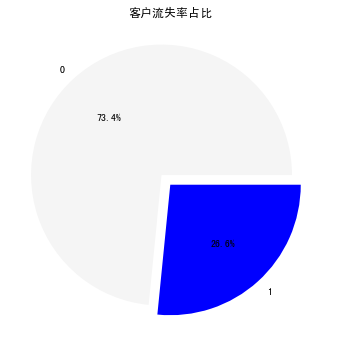

In [15]:
#客户流失率占比
"""
画饼图参数：
labels  (每一块)饼图外侧显示的说明文字
explode  (每一块)离开中心距离
startangle  起始绘制角度,默认图是从x轴正方向逆时针画起,如设定=90则从y轴正方向画起
shadow   是否阴影
labeldistance label  绘制位置,相对于半径的比例, 如<1则绘制在饼图内侧
autopct   控制饼图内百分比设置,可以使用format字符串或者format function
     '%1.1f'指小数点前后位数(没有用空格补齐)
pctdistance 类似于labeldistance,指定autopct的位置刻度
radius   控制饼图半径
"""

churnvalue=telcom['Churn'].value_counts()       #利用value_counts()建立临时表用于作图
labels=telcom['Churn'].value_counts().index     #饼状图所需数据为一维表

rcParams['figure.figsize']=6,6                  #设置饼图大小
plt.pie(churnvalue,labels=labels,colors=["whitesmoke","blue"],explode=(0.1,0),autopct='%1.1f%%')  #设置饼图参数
plt.rcParams['font.sans-serif'] = ['SimHei']    #设置中文
#plt.title("Proportions of Customer Churn")     #设置标题
plt.title('客户流失率占比')
plt.show()

Text(0.5, 1.0, '支付方式与流失率')

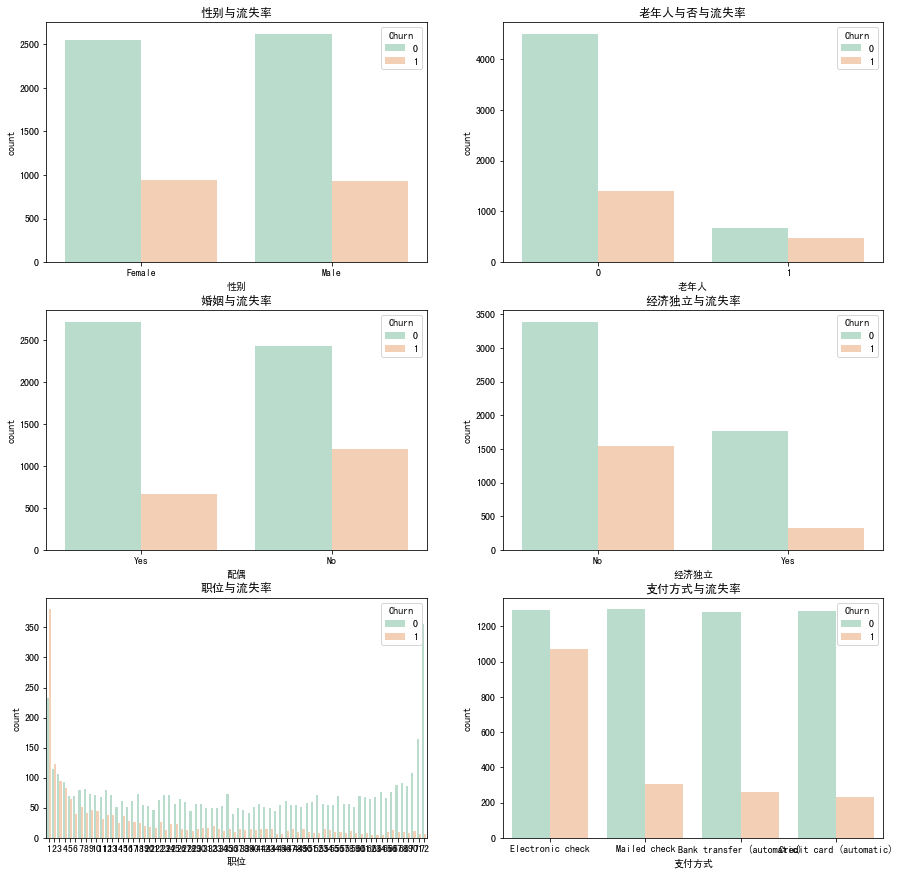

In [16]:
#其他基本特征对客户流失率的影响（如性别，年龄（是否老年人），婚姻状况（配偶），职位，是否经济独立以及支付方式）

f, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,15))
plt.rcParams['font.sans-serif'] = ['SimHei']

plt.subplot(3,2,1)
gender=sns.countplot(x="gender",hue="Churn",data=telcom,palette="Pastel2") # palette参数表示设置颜色，这里设置为主题色Pastel2
plt.xlabel("性别")
plt.title("性别与流失率")

plt.subplot(3,2,2)
seniorcitizen=sns.countplot(x="SeniorCitizen",hue="Churn",data=telcom,palette="Pastel2")
plt.xlabel("老年人")
plt.title("老年人与否与流失率")

plt.subplot(3,2,3)
partner=sns.countplot(x="Partner",hue="Churn",data=telcom,palette="Pastel2")
plt.xlabel("配偶")
plt.title("婚姻与流失率")

plt.subplot(3,2,4)
dependents=sns.countplot(x="Dependents",hue="Churn",data=telcom,palette="Pastel2")
plt.xlabel("经济独立")
plt.title("经济独立与流失率")

plt.subplot(3,2,5)
tenure=sns.countplot(x="tenure",hue="Churn",data=telcom,palette="Pastel2")
plt.xlabel("职位")
plt.title("职位与流失率")

plt.subplot(3,2,6)
paymentMethod=sns.countplot(x="PaymentMethod",hue="Churn",data=telcom,palette="Pastel2")
plt.xlabel("支付方式")
plt.title("支付方式与流失率")

结论：
从上图可以看出性别对流失率的影响不大，非老年人的流失率大于老年人，有配偶的客户更不易流失，经济不独立的客户流失率更大，使用电子支付的用户流失率更高。

In [17]:
#提取特征
charges=telcom.iloc[:,1:]

# 对特征进行编码
"""
离散特征的编码分为两种情况：
1、离散特征的取值之间没有大小的意义，比如color：[red,blue],那么就使用one-hot编码
2、离散特征的取值有大小的意义，比如size:[X,XL,XXL],那么就使用数值的映射{X:1,XL:2,XXL:3}
"""
corrDf=charges.apply(lambda x:pd.factorize(x)[0])
corrDf.sample(50)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4388,0,0,1,0,22,1,1,2,2,2,2,2,2,2,2,1,1,101,4163,0
1231,1,0,1,0,61,1,1,0,1,1,1,0,0,1,0,1,3,499,1207,0
6044,0,0,1,1,18,1,2,1,0,1,0,0,0,0,0,0,0,1514,5639,0
4473,0,1,0,0,70,1,2,1,0,1,1,0,1,1,0,0,2,1157,4236,0
5913,0,0,1,0,70,1,1,1,1,1,1,1,0,0,1,0,3,924,5521,0
123,0,0,0,1,40,1,1,0,1,1,0,0,0,0,0,1,1,114,122,0
997,0,1,1,0,54,1,2,1,0,1,0,0,1,1,0,0,0,403,980,1
983,1,0,1,0,0,1,2,1,0,1,0,0,0,1,0,0,0,206,967,1
4210,0,1,0,1,59,1,2,0,0,1,1,0,1,0,1,0,0,352,4004,0
3267,1,0,0,1,20,1,1,2,2,2,2,2,2,2,1,1,1,332,3146,0


In [18]:
# 构造相关性矩阵
corr = corrDf.corr()
corr

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001819,0.001379,0.010349,-0.000265,-0.007515,-0.010284,-0.002236,-0.004365,0.011081,0.004526,0.000057,0.000578,-0.001339,0.000095,0.011902,-0.004928,-0.008017,-0.012153,-0.008545
SeniorCitizen,-0.001819,1.000000,-0.016957,-0.210550,0.012240,0.008392,0.113769,-0.032160,-0.210546,-0.144762,-0.156700,-0.223438,-0.129721,-0.120658,-0.141820,-0.156258,-0.093712,0.049154,0.022949,0.150541
Partner,0.001379,-0.016957,1.000000,-0.452269,-0.100513,-0.018397,-0.118037,-0.000513,-0.081078,0.091536,-0.093391,-0.068277,-0.079066,-0.075310,-0.294094,-0.013957,-0.133280,-0.036518,-0.044214,0.149982
Dependents,0.010349,-0.210550,-0.452269,1.000000,0.044138,-0.001078,-0.019178,0.044030,0.188889,0.061970,0.154819,0.179176,0.138809,0.125086,0.240556,0.110131,0.124002,-0.028706,0.009710,-0.163128
tenure,-0.000265,0.012240,-0.100513,0.044138,1.000000,-0.017864,0.064580,-0.012924,0.014436,-0.066232,0.034744,0.030489,0.024719,0.030252,0.118664,-0.013160,0.075533,0.042605,0.112813,-0.143101
PhoneService,-0.007515,0.008392,-0.018397,-0.001078,-0.017864,1.000000,0.674824,0.387266,0.125544,0.129432,0.138938,0.123533,0.171773,0.164379,0.003019,-0.016696,-0.003106,-0.141696,-0.030534,0.011691
MultipleLines,-0.010284,0.113769,-0.118037,-0.019178,0.064580,0.674824,1.000000,0.186852,-0.066695,-0.130978,-0.012819,-0.066814,0.030524,0.027944,0.084037,-0.133538,0.026248,0.024221,0.014915,0.036148
InternetService,-0.002236,-0.032160,-0.000513,0.044030,-0.012924,0.387266,0.186852,1.000000,0.607412,0.650084,0.662685,0.609422,0.712715,0.708336,0.099579,0.138166,0.008851,-0.288948,-0.037709,-0.047097
OnlineSecurity,-0.004365,-0.210546,-0.081078,0.188889,0.014436,0.125544,-0.066695,0.607412,1.000000,0.621270,0.748684,0.790951,0.701526,0.704672,0.389138,0.333656,0.214330,-0.219289,-0.024821,-0.332443
OnlineBackup,0.011081,-0.144762,0.091536,0.061970,-0.066232,0.129432,-0.130978,0.650084,0.621270,1.000000,0.600952,0.616520,0.603551,0.606037,0.034745,0.260691,0.003786,-0.283212,-0.053770,-0.073934


Text(0.5, 1, 'Correlation between variables')

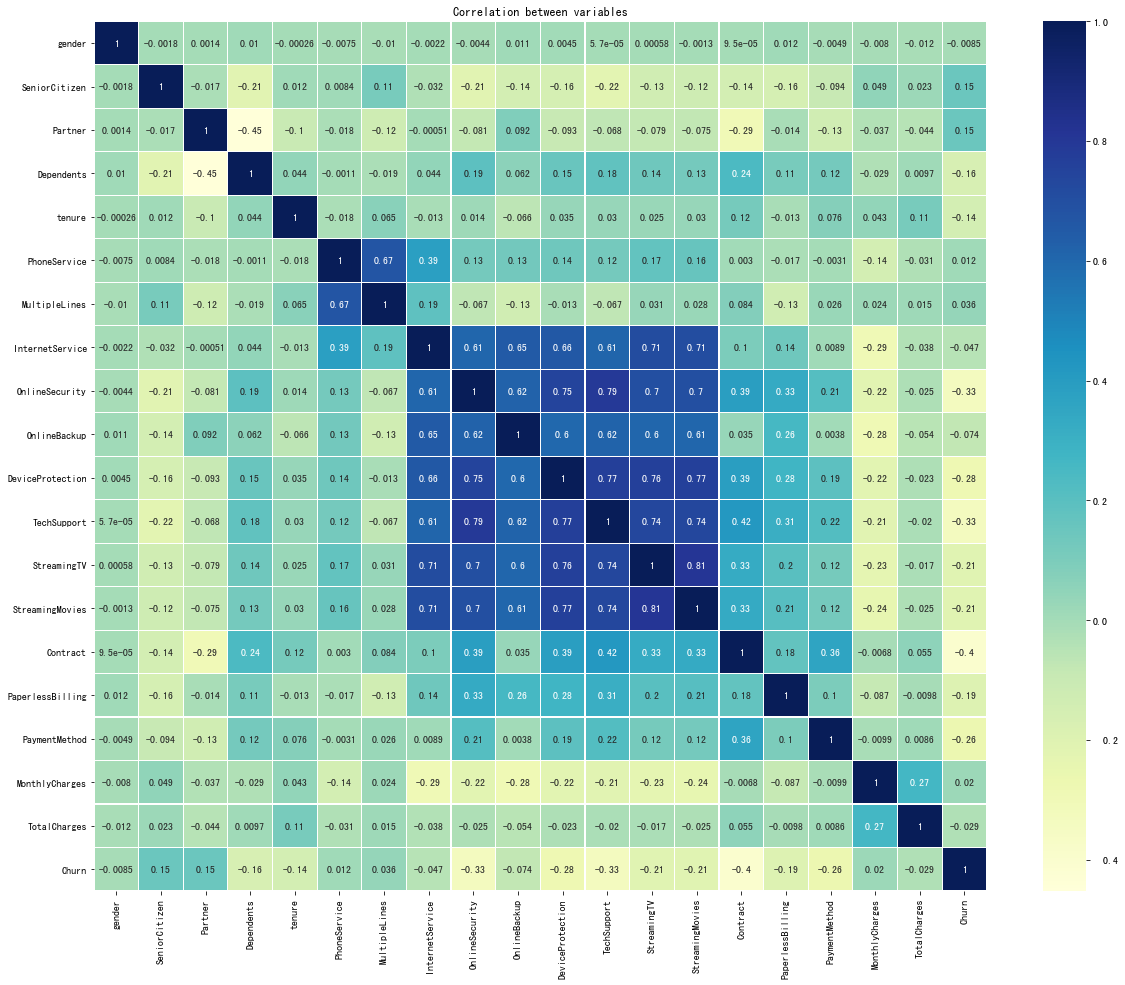

In [19]:
# 使用热地图显示相关系数
'''
heatmap    使用热地图展示系数矩阵情况
linewidths 热力图矩阵之间的间隔大小
annot      设定是否显示每个色块的系数值
'''
plt.figure(figsize=(20,16))
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=0.2, cmap="YlGnBu",annot=True)
plt.title("Correlation between variables")


结论：
1.从上图可以看出，互联网服务、网络安全服务、在线备份业务、设备保护业务、技术支持服务、网络电视和网络电影之间存在较强的相关性，多线业务和电话服务之间也有很强的相关性，并且都呈强正相关关系。
2.性别与流失率的相关性为-0.0085，呈弱相关，老年人、配偶、经济独立、支付方式均与流失率呈不同的正负相关性，也验证了前面柱状图的猜想。

Text(0.5, 1.0, '用户是否流失与各变量之间的相关性')

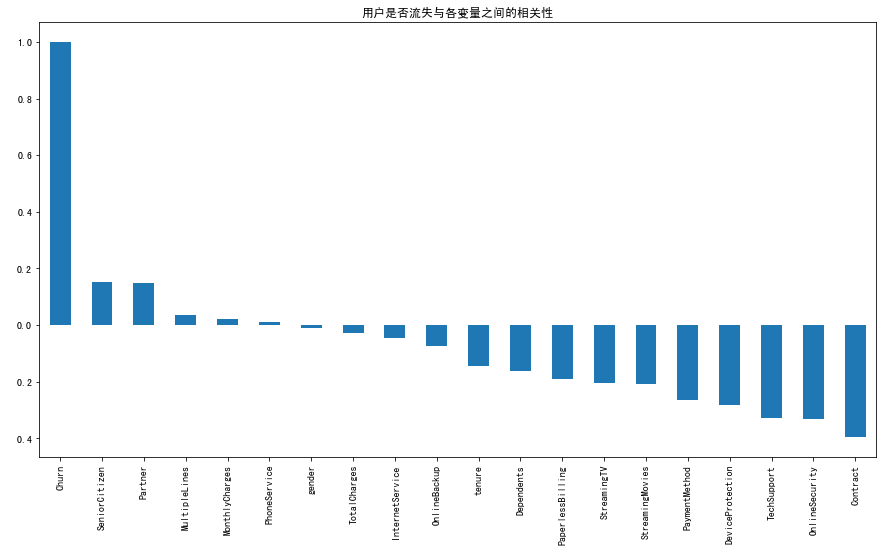

In [20]:
#用户是否流失与各变量之间的相关性
plt.figure(figsize=(15,8))
corr['Churn'].sort_values(ascending=False).plot(kind='bar')
plt.title('用户是否流失与各变量之间的相关性')


In [21]:
#使用one_hot编码
tel_dummies=pd.get_dummies(telcom.iloc[:,1:21])
tel_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


Text(0.5, 1.0, '用户是否流失与各变量之间的相关性-独热编码')

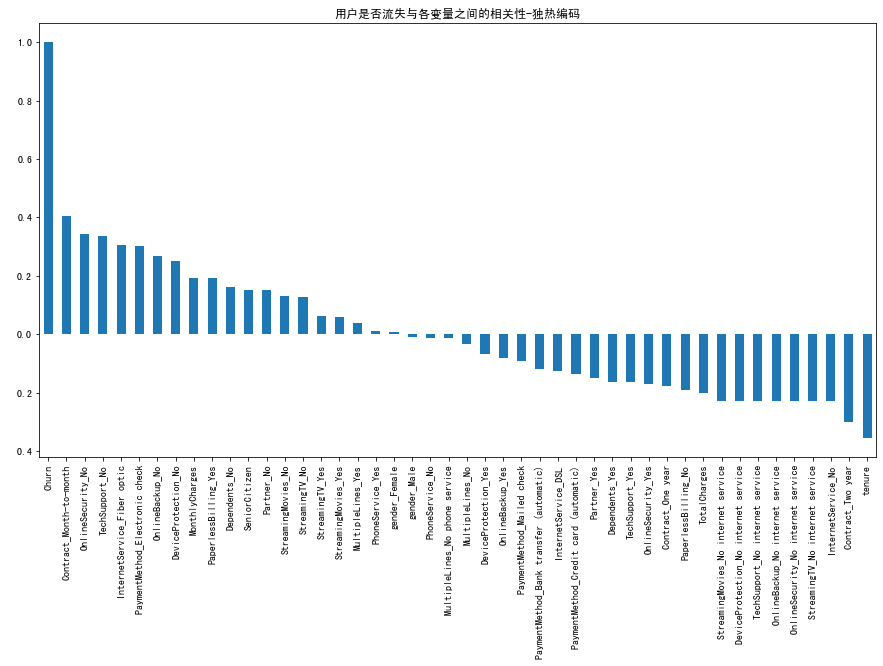

In [22]:
#用户是否流失与各变量之间的相关性
plt.figure(figsize=(15,8))
tel_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')
plt.title('用户是否流失与各变量之间的相关性-独热编码')

由图上可以看出，变量gender 和 PhoneService 处于图形中间，其值接近于 0 ，这两个变量对电信客户流失预测影响非常小，可以直接舍弃。

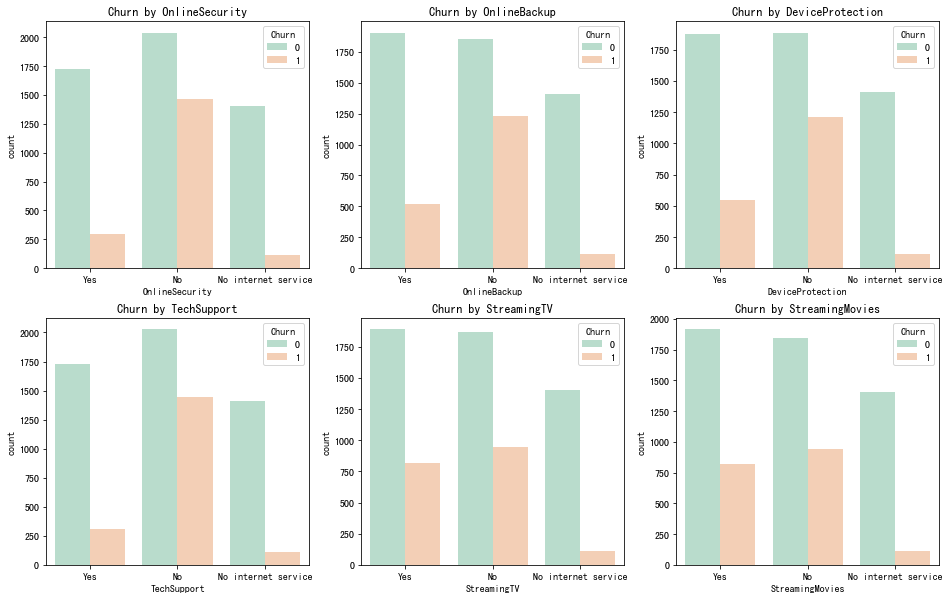

In [23]:
#网络安全服务、在线备份业务、设备保护业务、技术支持服务、网络电视、网络电影和无互联网服务对客户流失率的影响
covariables=["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]

fig,axes=plt.subplots(nrows=2,ncols=3,figsize=(16,10))
for i,item in enumerate(covariables):
    plt.subplot(2,3,(i+1))
    ax=sns.countplot(x=item,hue='Churn',data=telcom,palette="Pastel2",order=['Yes','No','No internet service'])
    plt.xlabel(str(item))
    plt.title("Churn by "+ str(item))
    i=i+1
plt.show()

由上图可以看出，在网络安全服务、在线备份业务、设备保护业务、技术支持服务、网络电视和网络电影六个变量中，没有互联网服务的客户流失率值是相同的，都是相对较低。
这可能是因为以上六个因素只有在客户使用互联网服务时才会影响客户的决策，这六个因素不会对不使用互联网服务的客户决定是否流失产生推论效应。

Text(0.5, 1.0, '签订合同方式对客户流失的影响')

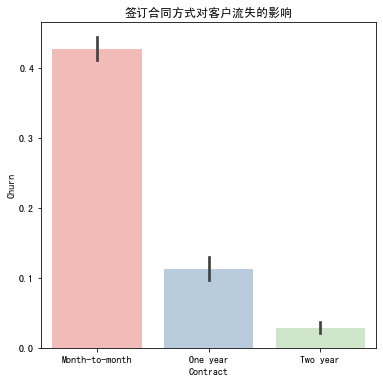

In [24]:
#签订合同方式对客户流失的影响

sns.barplot(x="Contract",y="Churn", data=telcom, palette="Pastel1", order= ['Month-to-month', 'One year', 'Two year'])
plt.title("签订合同方式对客户流失的影响")

由图上可以看出，签订合同方式对客户流失率影响为：按月签订 > 按一年签订 > 按两年签订，这可能表明，设定长期合同对留住现有客户更有效。

# 5.数据预处理

In [25]:
# 由前面结果可知，CustomerID表示每个客户的随机字符，对后续建模不影响，所以选择删除CustomerID列；
# gender 和 PhoneService 与流失率的相关性低，可直接忽略。

telcomvar=telcom.iloc[:,2:20]
telcomvar.drop('PhoneService',axis=1,inplace=True)

# 提取ID
telcom_id = telcom['customerID']

telcomvar.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,Yes,No,1,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,0,No,No,34,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,0,No,No,2,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,0,No,No,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,0,No,No,2,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [26]:
#对客户的职位、月消费数及总消费数进行均值和方差缩放，对数据进行标准化。
"""
标准化数据，保证每个维度的特征数据方差为1，均值为0，使得预测结果不会被某些维度过大的特征值而主导。
"""
scaler=StandardScaler(copy=False)
scaler.fit_transform(telcomvar[['tenure','MonthlyCharges','TotalCharges']])


array([[-1.28024804, -1.16169394, -0.99419409],
       [ 0.06430269, -0.26087792, -0.17373982],
       [-1.23950408, -0.36392329, -0.95964911],
       ...,
       [-0.87280842, -1.17000405, -0.85451414],
       [-1.15801615,  0.31916782, -0.87209546],
       [ 1.36810945,  1.35793167,  2.01234407]])

In [27]:
telcomvar[['tenure','MonthlyCharges','TotalCharges']]=scaler.transform(telcomvar[['tenure','MonthlyCharges','TotalCharges']])
telcomvar.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,Yes,No,-1.280248,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,-1.161694,-0.994194
1,0,No,No,0.064303,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,-0.260878,-0.173740
2,0,No,No,-1.239504,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,-0.363923,-0.959649
3,0,No,No,0.512486,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),-0.747850,-0.195248
4,0,No,No,-1.239504,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0.196178,-0.940457


Text(0.5, 1.0, 'tenure、MonthlyCharges、TotalCharges的箱型分布')

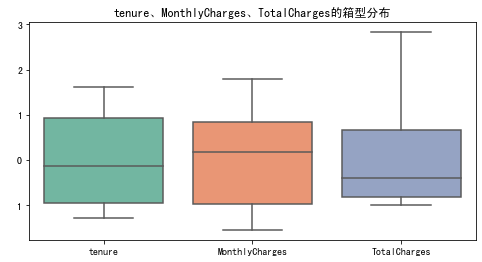

In [28]:
#使用箱形图查看是否存在异常值
plt.figure(figsize=(8,4))
box=sns.boxplot(data=telcomvar[['tenure','MonthlyCharges','TotalCharges']],palette="Set2")
plt.title('tenure、MonthlyCharges、TotalCharges的箱型分布')

In [29]:
#查看对象类型字段中的值
"""方法1"""

def uni(columnlabel):
    print(columnlabel,'--',telcomvar[columnlabel].unique())      # unique函数去除其中重复的元素，返回唯一值
    
telcomobject=telcomvar.select_dtypes(['object'])
for i in range(0,len(telcomobject.columns)):
    uni(telcomobject.columns[i])

Partner -- ['Yes' 'No']
Dependents -- ['No' 'Yes']
MultipleLines -- ['No phone service' 'No' 'Yes']
InternetService -- ['DSL' 'Fiber optic' 'No']
OnlineSecurity -- ['No' 'Yes' 'No internet service']
OnlineBackup -- ['Yes' 'No' 'No internet service']
DeviceProtection -- ['No' 'Yes' 'No internet service']
TechSupport -- ['No' 'Yes' 'No internet service']
StreamingTV -- ['No' 'Yes' 'No internet service']
StreamingMovies -- ['No' 'Yes' 'No internet service']
Contract -- ['Month-to-month' 'One year' 'Two year']
PaperlessBilling -- ['Yes' 'No']
PaymentMethod -- ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [30]:
"""或方法2"""

"""
telcomobject=telcomvar.select_dtypes(['object'])

for i,item in enumerate(telcomobject.columns):
    i=i
    print(item,'--',telcomvar[item].unique())
    i=i+1
"""

"\ntelcomobject=telcomvar.select_dtypes(['object'])\n\nfor i,item in enumerate(telcomobject.columns):\n    i=i\n    print(item,'--',telcomvar[item].unique())\n    i=i+1\n"

综合之前的结果来看，在六个变量中存在No internet service，即无互联网服务对客户流失率影响很小，这些客户不使用任何互联网产品，因此可以将No internet service 和 No 是一样的效果，可以使用 No 替代 No internet service。

In [31]:
#替换值
telcomvar.replace(to_replace='No internet service',value='No',inplace=True)
telcomvar.replace(to_replace='No phone service',value='No',inplace=True)
for i in range(0,len(telcomobject.columns)):
    uni(telcomobject.columns[i])

Partner -- ['Yes' 'No']
Dependents -- ['No' 'Yes']
MultipleLines -- ['No' 'Yes']
InternetService -- ['DSL' 'Fiber optic' 'No']
OnlineSecurity -- ['No' 'Yes']
OnlineBackup -- ['Yes' 'No']
DeviceProtection -- ['No' 'Yes']
TechSupport -- ['No' 'Yes']
StreamingTV -- ['No' 'Yes']
StreamingMovies -- ['No' 'Yes']
Contract -- ['Month-to-month' 'One year' 'Two year']
PaperlessBilling -- ['Yes' 'No']
PaymentMethod -- ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [32]:
#使用Scikit-learn标签编码,将分类数据转换为整数编码

def labelencode(columnlabel):
    telcomvar[columnlabel]=LabelEncoder().fit_transform(telcomvar[columnlabel])
    
for i in range(0,len(telcomobject.columns)):
    labelencode(telcomobject.columns[i])
    
for i in range(0,len(telcomobject.columns)):
    uni(telcomobject.columns[i])

Partner -- [1 0]
Dependents -- [0 1]
MultipleLines -- [0 1]
InternetService -- [0 1 2]
OnlineSecurity -- [0 1]
OnlineBackup -- [1 0]
DeviceProtection -- [0 1]
TechSupport -- [0 1]
StreamingTV -- [0 1]
StreamingMovies -- [0 1]
Contract -- [0 1 2]
PaperlessBilling -- [1 0]
PaymentMethod -- [2 3 0 1]


# 6.构建模型

In [33]:
#建立训练集和测试集

"""
我们需要将数据集拆分为训练集和测试集以进行验证。
由于我们所拥有的数据集是不平衡的，所以最好使用分层交叉验证来确保训练集和测试集都包含每个类样本的保留人数。
交叉验证函数StratifiedShuffleSplit，功能是从样本数据中随机按比例选取训练数据（train）和测试数据（test）
参数 n_splits是将训练数据分成train/test对的组数，可根据需要进行设置，默认为10
参数test_size和train_size是用来设置train/test对中train和test所占的比例
参数 random_state控制是将样本随机打乱
"""

X=telcomvar
y=telcom["Churn"].values

sss=StratifiedShuffleSplit(n_splits=5,test_size=0.8,random_state=0)
print(sss)
print("训练数据和测试数据被分成的组数：",sss.get_n_splits(X,y))

StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=0.8,
            train_size=None)
训练数据和测试数据被分成的组数： 5


In [34]:
# 建立训练数据和测试数据
for train_index,test_index in sss.split(X,y):
    print('train:',train_index,'test:',test_index)
    X_train,X_test=X.iloc[train_index],X.iloc[test_index]
    y_train,y_test=y[train_index],y[test_index]

train: [5666 4355 3205 ...  850 3100  302] test: [5678 1688 3266 ...  260 6298 2726]
train: [1838   73 5096 ... 6925  894 2594] test: [1965   84 3719 ...    6 2402 2190]
train: [4912  608 6678 ...  742  131  996] test: [1459 1209 1706 ... 3984 2849 6808]
train: [4902 5744 5626 ... 4840 6347 3383] test: [4234  803 2520 ... 4703 4785 2111]
train: [3318 1463 2728 ... 6161 4595 6385] test: [4288 6943 2150 ... 2124 6677 2226]


In [35]:
# 输出数据集大小
print('原始数据特征：', X.shape,
      '训练数据特征：',X_train.shape,
      '测试数据特征：',X_test.shape)

print('原始数据标签：', y.shape,
      '   训练数据标签：',y_train.shape,
      '   测试数据标签：',y_test.shape)

原始数据特征： (7032, 17) 训练数据特征： (1406, 17) 测试数据特征： (5626, 17)
原始数据标签： (7032,)    训练数据标签： (1406,)    测试数据标签： (5626,)


In [36]:
#选择机器学习算法
#使用分类算法
Classifiers=[["Random Forest",RandomForestClassifier()],
             ["Support Vector Machine",SVC()],
             ["LogisticRegression",LogisticRegression()],
             ["KNN",KNeighborsClassifier(n_neighbors=5)],
             ["Naive Bayes",GaussianNB()],
             ["Decision Tree",DecisionTreeClassifier()],
             ["AdaBoostClassifier", AdaBoostClassifier()],
             ["GradientBoostingClassifier", GradientBoostingClassifier()],
             ["XGB", XGBClassifier()],
             ["CatBoost", CatBoostClassifier(logging_level='Silent')]]

In [37]:
#训练模型

Classify_result=[]
names=[]
prediction=[]
for name,classifier in Classifiers:
    classifier=classifier
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    recall=recall_score(y_test,y_pred)                           #召回率
    precision=precision_score(y_test,y_pred)                     #精确度
    f1score = 2 * (precision * recall) / (precision + recall)    #F1分数
    class_eva=pd.DataFrame([recall,precision,f1score])           #按照预测指标及算法名称构建对比表
    Classify_result.append(class_eva)
    name=pd.Series(name)
    names.append(name)
    y_pred=pd.Series(y_pred)
    prediction.append(y_pred)

In [38]:
#评估模型
"""
召回率（recall）的含义是：原本为对的当中，预测为对的比例（值越大越好，1为理想状态）
精确率、精度（precision）的含义是：预测为对的当中，原本为对的比例（值越大越好，1为理想状态）
F1分数（F1-Score）指标综合了Precision与Recall的产出的结果
F1-Score的取值范围从0到1的，1代表模型的输出最好，0代表模型的输出结果最差。
"""

names=pd.DataFrame(names)
names=names[0].tolist()
result=pd.concat(Classify_result,axis=1)
result.columns=names
result.index=['recall','precision','f1score']
result


,Random Forest,Support Vector Machine,LogisticRegression,KNN,Naive Bayes,Decision Tree,AdaBoostClassifier,GradientBoostingClassifier,XGB,CatBoost
recall,0.481605,0.490301,0.522408,0.523077,0.731104,0.507023,0.543813,0.517726,0.488963,0.525084
precision,0.633245,0.640734,0.628319,0.562185,0.538689,0.473159,0.630721,0.637562,0.561013,0.631537
f1score,0.547112,0.555513,0.570489,0.541927,0.620318,0.489506,0.584052,0.571429,0.522516,0.573411


综上所述，在10种分类算法中朴素贝叶斯（Naive Bayes）的F1分数最大为62.03%，所以使用朴素贝叶斯模型效果最好。

# 7.实施方案

In [39]:
# 预测数据集特征（由于没有提供预测数据集，这里选取后10行作为需要预测的数据集）
pred_X = telcomvar.tail(10)

# 提取customerID
pre_id = telcom_id.tail(10)

# 使用朴素贝叶斯方法，对预测数据集中的生存情况进行预测
model = GaussianNB()
model.fit(X_train,y_train)
pred_y = model.predict(pred_X)

# 预测结果
predDf = pd.DataFrame({'customerID':pre_id, 'Churn':pred_y})
predDf

,customerID,Churn
7033,9767-FFLEM,1
7034,0639-TSIQW,0
7035,8456-QDAVC,1
7036,7750-EYXWZ,0
7037,2569-WGERO,0
7038,6840-RESVB,0
7039,2234-XADUH,0
7040,4801-JZAZL,0
7041,8361-LTMKD,1
7042,3186-AJIEK,0


通过上述分析，我们可以得出容易流失的用户特征：

· 老年用户与未婚且经济未独立的青少年用户更容易流失。

· 电话服务对用户的流失没有直接的影响。

· 提供的各项网络服务项目能够降低用户的流失率。

· 签订合同越久，用户的留存率越高。

· 采用电子支付（electronic check）的用户更易流失。

针对上述诊断结果，可有针对性的对此提出建议：
推荐老年用户与青少年用户采用数字网络，且签订2年期合同（可以各种辅助优惠等营销手段来提高2年期合同的签订率），若能开通相关网络服务可增加用户粘性，因此可增加这块业务的推广，同时考虑改善电子账单支付的用户体验。